# Explore here

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [12]:
# Convert 'date' to datetime and 'sales_amount' to a numeric type if not already
total_data['date'] = pd.to_datetime(total_data['date'])
total_data['sales'] = pd.to_numeric(total_data['sales'], errors='coerce')

# Check data types again
print(total_data.dtypes)



date     datetime64[ns]
sales           float64
dtype: object


In [13]:
print(total_data.isnull().sum())
# Drop rows with any missing values in 'date' or 'sales_amount' if necessary
total_data.dropna(subset=['date', 'sales'], inplace=True)



date     0
sales    0
dtype: int64


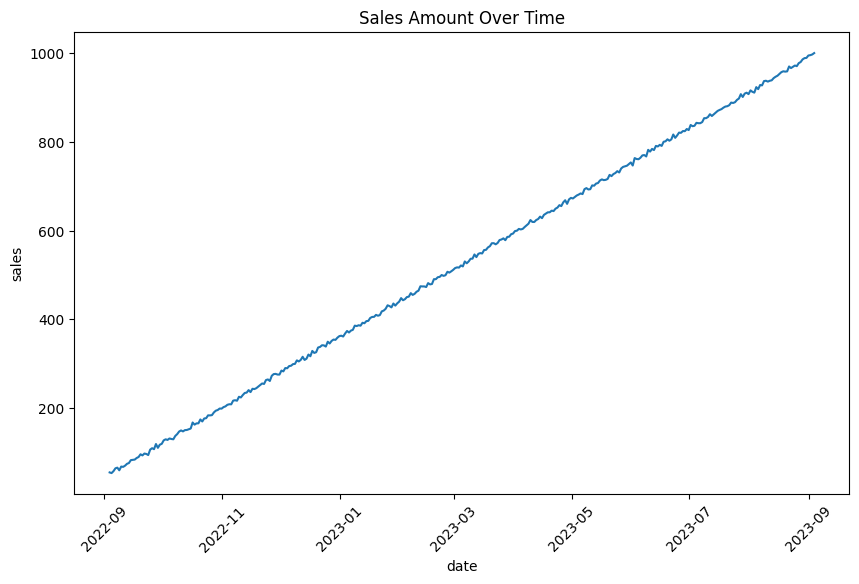

In [14]:
# Sort the DataFrame by 'date' if not already sorted
total_data.sort_values('date', inplace=True)

# Try plotting again
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_data, x='date', y='sales')
plt.xticks(rotation=45)
plt.title('Sales Amount Over Time')
plt.show()


In [15]:
print(total_data.shape)  # This gives you the dimensions of the DataFrame


(366, 2)


In [16]:
# Correct way to convert 'date' to datetime format
total_data['date'] = pd.to_datetime(total_data['date'])
total_data.set_index('date', inplace=True)



In [20]:
# Corrected resampling code using 'ME' for month-end frequency
monthly_sales = total_data['sales'].resample('ME').sum()



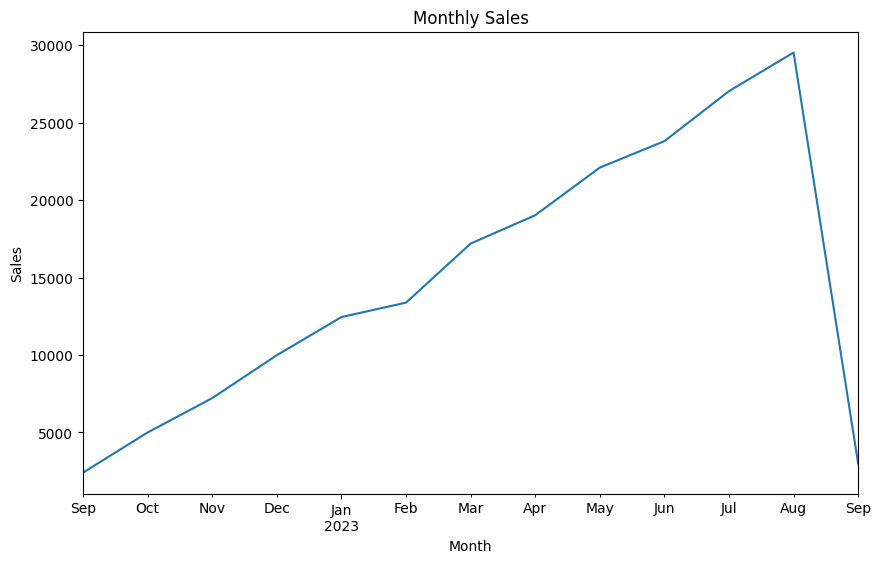

In [21]:
import matplotlib.pyplot as plt

# Plotting the monthly sales
monthly_sales.plot(figsize=(10, 6), title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [25]:
# Resampling to get monthly sales using 'ME' for month-end frequency
monthly_sales = total_data['sales'].resample('ME').sum()


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(total_data['sales'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


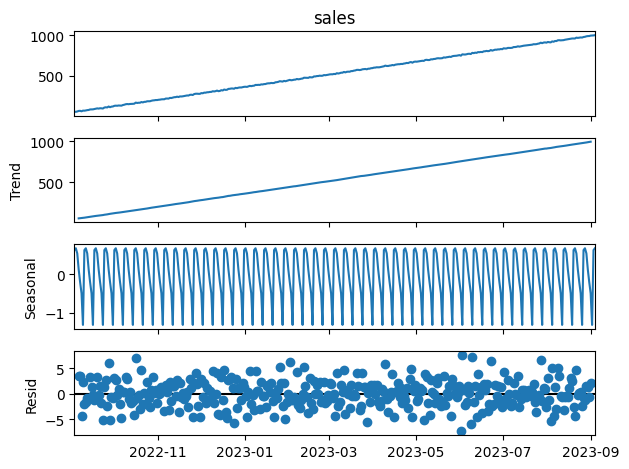

In [ ]:
#Is there variability or noise?

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'total_data' is your time series DataFrame and it's indexed by date.
decomposition = seasonal_decompose(total_data['sales'], model='additive')
decomposition.plot()
plt.show()


In [ ]:
seasonal_data = seasonal_decompose
plot

Step 3: Train an ARIMA

In [ ]:
#Step 3: Train an ARIMA

import pmdarima as pm

# Assuming total_data['sales'] is your time series.


time_series = total_data['sales'].squeeze()

# The auto_arima function
model = pm.auto_arima(time_series, seasonal=False, stepwise=True, suppress_warnings=True, 
                      error_action="ignore", max_order=None, trace=True)

# Summary of the model
model.summary()




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.727 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Tue, 09 Apr 2024   AIC                           1839.552
Time:                        00:24:25   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Step 4: Predict with the test set
#Now use the trained model with the test set and compare the points with the real ones. Measure the performance of the time serie.

# Assuming 'time_series' is your entire dataset and is a Pandas Series
# Let's say you want to keep the last N points for testing
n_test = 12  # For example, last 12 points as test set

train = time_series[:-n_test]
test = time_series[-n_test:]


In [ ]:
model.fit(train)


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# Forecast the next 'n_test' points
#Make prediction
forecast = model.predict(n_periods=n_test)


In [ ]:
#compare prediction to the actual test set

import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test.index, test, label='Actual')

# Plot the predicted values
plt.plot(test.index, forecast, label='Forecast', alpha=0.7)

plt.title('ARIMA Model Forecast vs Actuals')
plt.legend()
plt.show()


In [ ]:
#Evaluate the model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
